In [47]:
import numpy as np
import pandas as pd
import os
from pandas.plotting import autocorrelation_plot as auto_corr
import matplotlib.pyplot as plt  
%matplotlib inline    
import matplotlib as mpl
import seaborn as sns

In [48]:
train = pd.read_csv('train.csv')
features = pd.read_csv('features.csv')
stores = pd.read_csv('stores.csv')
test = pd.read_csv('test.csv')

Let's merge datasets

In [49]:
dataset=train.merge(features, on=['Store', 'Date'], how='inner').merge(stores, on=['Store'], how='inner')
dataset.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315


In [50]:
dataset.drop(['IsHoliday_y'], axis=1,inplace=True)
dataset.rename(columns={'IsHoliday_x':'IsHoliday'},inplace=True) 
dataset.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315


In [51]:
print(dataset['Store'].nunique())
print(dataset['Dept'].nunique())

45
81


FROM CODE.IPYNB we could see:
Store numbers: 1 to 45
Department numbers: 1 to 99 (some numbers missing: 88 or 89 etc.) 
Total number of departments is 81.

There are some wrong values: 0 and minus values for weekly sales.
Sales amount can not be minus. 
Not possible for one department not to sell anything whole week. 
Let's fix these values.

In [52]:
dataset.loc[dataset['Weekly_Sales']<=0]

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
846,1,6,2012-08-10,-139.65,False,85.05,3.494,11436.22,245.0,6.85,6964.26,4836.22,221.958433,6.908,A,151315
2384,1,18,2012-05-04,-1.27,False,75.55,3.749,21290.13,NaN,69.89,4977.35,3261.04,221.671800,7.143,A,151315
6048,1,47,2010-02-19,-863.00,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
6049,1,47,2010-03-12,-698.00,False,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106,A,151315
6051,1,47,2010-10-08,-58.00,False,63.93,2.633,NaN,NaN,NaN,NaN,NaN,211.746754,7.838,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419597,45,80,2010-02-12,-0.43,True,27.73,2.773,NaN,NaN,NaN,NaN,NaN,181.982317,8.992,B,118221
419598,45,80,2010-02-19,-0.27,False,31.27,2.745,NaN,NaN,NaN,NaN,NaN,182.034782,8.992,B,118221
419603,45,80,2010-04-16,-1.61,False,54.28,2.899,NaN,NaN,NaN,NaN,NaN,181.692477,8.899,B,118221
419614,45,80,2010-07-02,-0.27,False,76.61,2.815,NaN,NaN,NaN,NaN,NaN,182.318780,8.743,B,118221


1358 rows in 421570 rows means 0.3%.
Delete and ignore these rows which contains wrong sales values.

In [53]:
dataset = dataset.loc[dataset['Weekly_Sales'] > 0]
dataset.shape 

(420212, 16)

C:\Users\Chirag\AppData\Local\Temp\ipykernel_23916\2483616707.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


<Axes: xlabel='IsHoliday', ylabel='Weekly_Sales'>

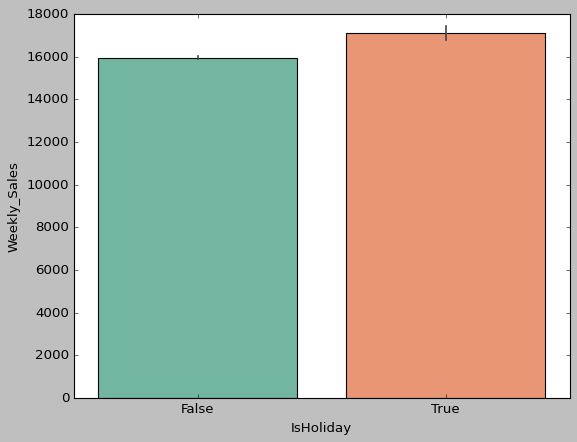

In [54]:
sns.barplot(
    x='IsHoliday',
    y='Weekly_Sales',
    data=dataset,
    palette='Set2'  # or 'pastel', 'Set1', 'coolwarm', etc.
)


In [55]:
df_holiday = dataset.loc[dataset['IsHoliday']==True]
df_holiday['Date'].unique()

array(['2010-02-12', '2010-09-10', '2010-11-26', '2010-12-31',
       '2011-02-11', '2011-09-09', '2011-11-25', '2011-12-30',
       '2012-02-10', '2012-09-07'], dtype=object)

In [56]:
df_not_holiday = dataset.loc[dataset['IsHoliday']==False]
df_not_holiday['Date'].nunique() 

133

1) Average weekly sales for holidays are significantly higher than not-holiday days. 
2) In train data, there are 133 weeks for non-holiday and 10 weeks for holiday.

In [57]:
# Christmas and New Year's Eve
dataset.loc[dataset['Date'].isin(['2010-12-31', '2011-12-30', '2012-12-28']), 'Christmas'] = True
dataset.loc[~dataset['Date'].isin(['2010-12-31', '2011-12-30', '2012-12-28']), 'Christmas'] = False

# Thanksgiving
dataset.loc[dataset['Date'].isin(['2010-11-26', '2011-11-25', '2012-11-23']), 'Thanksgiving'] = True
dataset.loc[~dataset['Date'].isin(['2010-11-26', '2011-11-25', '2012-11-23']), 'Thanksgiving'] = False

# Super Bowl (Feb 6, 2011; Feb 5, 2012; Feb 3, 2013 — use preceding Friday)
dataset.loc[dataset['Date'].isin(['2010-02-12', '2011-02-11', '2012-02-10']), 'SuperBowl'] = True
dataset.loc[~dataset['Date'].isin(['2010-02-12', '2011-02-11', '2012-02-10']), 'SuperBowl'] = False

# Labor Day (1st Monday of Sept → Friday before)
dataset.loc[dataset['Date'].isin(['2010-09-10', '2011-09-09', '2012-09-07']), 'LaborDay'] = True
dataset.loc[~dataset['Date'].isin(['2010-09-10', '2011-09-09', '2012-09-07']), 'LaborDay'] = False

# Easter (Good Friday: Apr 2, 2010; Apr 22, 2011; Apr 6, 2012)
dataset.loc[dataset['Date'].isin(['2010-04-02', '2011-04-22', '2012-04-06']), 'Easter'] = True
dataset.loc[~dataset['Date'].isin(['2010-04-02', '2011-04-22', '2012-04-06']), 'Easter'] = False

# Halloween (Oct 31 → use Friday of that week)
dataset.loc[dataset['Date'].isin(['2010-10-29', '2011-10-28', '2012-10-26']), 'Halloween'] = True
dataset.loc[~dataset['Date'].isin(['2010-10-29', '2011-10-28', '2012-10-26']), 'Halloween'] = False

# Independence Day (July 4 → Friday of that week)
dataset.loc[dataset['Date'].isin(['2010-07-02', '2011-07-01', '2012-07-06']), 'IndependenceDay'] = True
dataset.loc[~dataset['Date'].isin(['2010-07-02', '2011-07-01', '2012-07-06']), 'IndependenceDay'] = False

# Back to School (early August weeks)
dataset.loc[dataset['Date'].isin(['2010-08-06', '2010-08-13', '2011-08-05', '2011-08-12', '2012-08-03', '2012-08-10']), 'BackToSchool'] = True
dataset.loc[~dataset['Date'].isin(['2010-08-06', '2010-08-13', '2011-08-05', '2011-08-12', '2012-08-03', '2012-08-10']), 'BackToSchool'] = False


In [58]:
dataset.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,...,Type,Size,Christmas,Thanksgiving,SuperBowl,LaborDay,Easter,Halloween,IndependenceDay,BackToSchool
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,...,A,151315,False,False,False,False,False,False,False,False
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,...,A,151315,False,False,True,False,False,False,False,False
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,...,A,151315,False,False,False,False,False,False,False,False
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,...,A,151315,False,False,False,False,False,False,False,False
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,...,A,151315,False,False,False,False,False,False,False,False


In [59]:
# Christmas
print("Christmas:")
print(dataset.groupby(['Christmas', 'Type'])['Weekly_Sales'].mean(), '\n')

# Thanksgiving
print("Thanksgiving:")
print(dataset.groupby(['Thanksgiving', 'Type'])['Weekly_Sales'].mean(), '\n')



Christmas:
Christmas  Type
False      A       20174.350209
           B       12301.986116
           C        9570.951973
True       A       18310.167535
           B       11488.988057
           C        8031.520607
Name: Weekly_Sales, dtype: float64 

Thanksgiving:
Thanksgiving  Type
False         A       20044.007801
              B       12197.717405
              C        9547.377807
True          A       27397.776346
              B       18733.973971
              C        9696.566616
Name: Weekly_Sales, dtype: float64 



In [60]:

# Super Bowl
print("Super Bowl:")
print(dataset.groupby(['SuperBowl', 'Type'])['Weekly_Sales'].mean(), '\n')

# Labor Day
print("Labor Day:")
print(dataset.groupby(['LaborDay', 'Type'])['Weekly_Sales'].mean(), '\n')


Super Bowl:
SuperBowl  Type
False      A       20138.055908
           B       12286.739293
           C        9536.110508
True       A       20612.757674
           B       12467.035506
           C       10179.271884
Name: Weekly_Sales, dtype: float64 

Labor Day:
LaborDay  Type
False     A       20151.210941
          B       12294.954138
          C        9542.098293
True      A       20004.267422
          B       12084.304642
          C        9893.459258
Name: Weekly_Sales, dtype: float64 



In [61]:
# Easter
print("Easter:")
print(dataset.groupby(['Easter', 'Type'])['Weekly_Sales'].mean(), '\n')

# Halloween
print("Halloween:")
print(dataset.groupby(['Halloween', 'Type'])['Weekly_Sales'].mean(), '\n')



Easter:
Easter  Type
False   A       20113.363216
        B       12271.307975
        C        9546.313948
True    A       21761.742889
        B       13183.964464
        C        9693.984286
Name: Weekly_Sales, dtype: float64 

Halloween:
Halloween  Type
False      A       20168.192806
           B       12302.961491
           C        9556.628353
True       A       19209.406365
           B       11715.081402
           C        9215.862595
Name: Weekly_Sales, dtype: float64 



In [62]:

# Independence Day
print("Independence Day:")
print(dataset.groupby(['IndependenceDay', 'Type'])['Weekly_Sales'].mean(), '\n')

# Back to School
print("Back to School:")
print(dataset.groupby(['BackToSchool', 'Type'])['Weekly_Sales'].mean(), '\n')



Independence Day:
IndependenceDay  Type
False            A       20126.174161
                 B       12275.235561
                 C        9548.870991
True             A       21176.743389
                 B       13010.163945
                 C        9576.509431
Name: Weekly_Sales, dtype: float64 

Back to School:
BackToSchool  Type
False         A       20133.901717
              B       12292.615195
              C        9544.260318
True          A       20474.465056
              B       12242.976601
              C        9667.611365
Name: Weekly_Sales, dtype: float64 



In [63]:
dataset.groupby('IsHoliday')['Weekly_Sales'].mean()

IsHoliday
False    15952.816352
True     17094.300918
Name: Weekly_Sales, dtype: float64

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


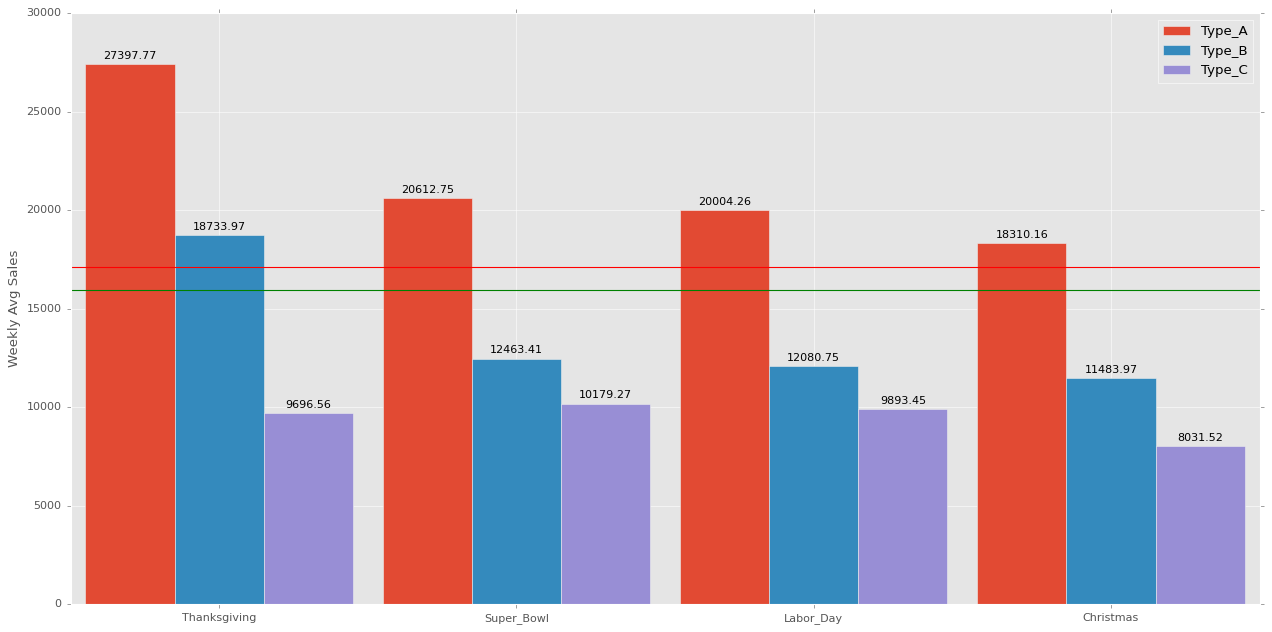

In [73]:
import matplotlib.pyplot as plt
print(plt.style.available)

plt.style.use('ggplot')
labels = ['Thanksgiving', 'Super_Bowl', 'Labor_Day', 'Christmas']
A_means = [27397.77, 20612.75, 20004.26, 18310.16]
B_means = [18733.97, 12463.41, 12080.75, 11483.97]
C_means = [9696.56,10179.27,9893.45,8031.52]

x = np.arange(len(labels))  
width = 0.3

fig, ax = plt.subplots(figsize=(16, 8))
rects1 = ax.bar(x - width, A_means, width, label='Type_A')
rects2 = ax.bar(x , B_means, width, label='Type_B')
rects3 = ax.bar(x + width, C_means, width, label='Type_C')


ax.set_ylabel('Weekly Avg Sales')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.axhline(y=17094.30,color='r') # holidays avg
plt.axhline(y=15952.82,color='green') # not-holiday avg

fig.tight_layout()

plt.show()

# Observation: 
Highest sale average is in the Thanksgiving week between holidays. 
2) All holidays Type A stores has highest sales. 
3) Min sale is at the time of christmas

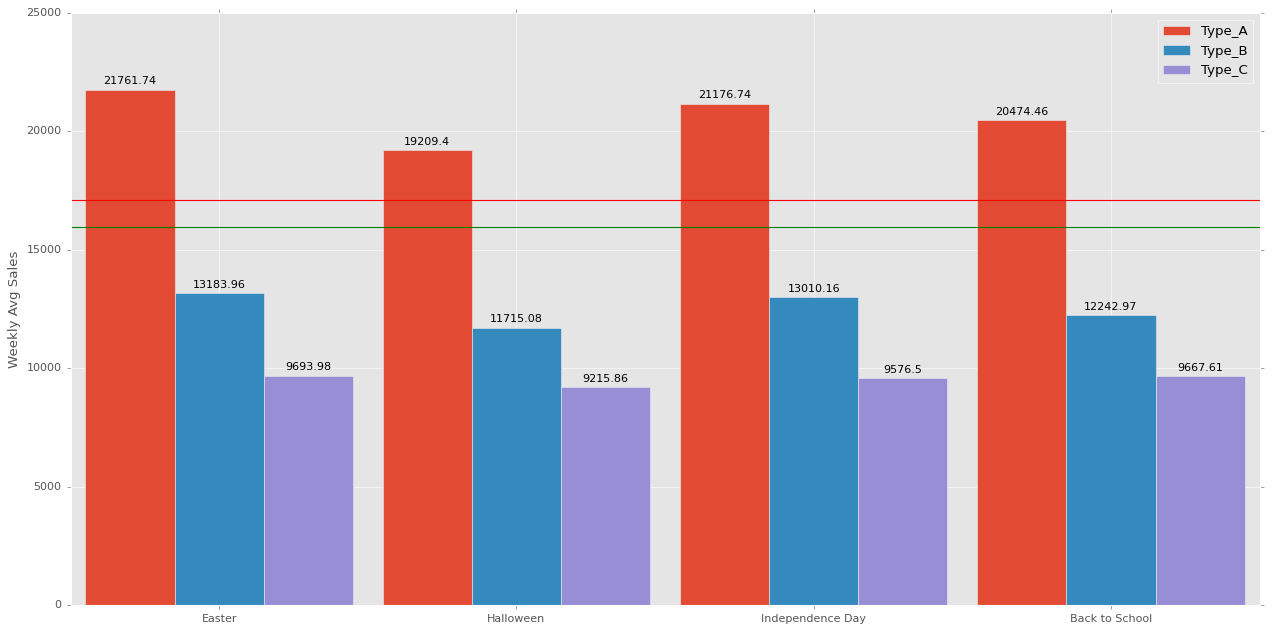

In [74]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')
labels = ['Easter', 'Halloween', 'Independence Day', 'Back to School']
A_means = [21761.74, 19209.40, 21176.74, 20474.46]
B_means = [13183.96, 11715.08, 13010.16, 12242.97]
C_means = [9693.98, 9215.86, 9576.5, 9667.61]

x = np.arange(len(labels)) 
width = 0.3  

fig, ax = plt.subplots(figsize=(16, 8))
rects1 = ax.bar(x - width, A_means, width, label='Type_A')
rects2 = ax.bar(x , B_means, width, label='Type_B')
rects3 = ax.bar(x + width, C_means, width, label='Type_C')


ax.set_ylabel('Weekly Avg Sales')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.axhline(y=17094.30,color='r') # holidays avg
plt.axhline(y=15952.82,color='green') # not-holiday avg

fig.tight_layout()

plt.show()

In [66]:
dataset["Date"] = pd.to_datetime(dataset["Date"]) # convert to datetime
dataset['week'] =dataset['Date'].dt.isocalendar().week
dataset['month'] =dataset['Date'].dt.month 
dataset['year'] =dataset['Date'].dt.year

dataset.groupby('month')['Weekly_Sales'].mean().sort_values(ascending=False)

month
12    19425.798603
11    17534.964277
6     16397.605478
8     16113.800069
2     16048.701191
7     15905.472425
5     15845.556200
4     15696.435193
3     15464.817698
10    15279.182119
9     15147.216063
1     14182.239153
Name: Weekly_Sales, dtype: float64

November and December have the highest Sales

In [67]:
dataset.groupby('year')['Weekly_Sales'].mean()

year
2010    16318.648285
2011    16007.797985
2012    15748.265005
Name: Weekly_Sales, dtype: float64

Sales have reduced over the years

In [68]:
dataset.groupby('week')['Weekly_Sales'].mean().sort_values(ascending=False).head()

week
51    26454.164116
47    22269.601768
50    20478.421134
49    18731.794840
22    16856.650245
Name: Weekly_Sales, dtype: float64

Top 5 sales averages by weekly belongs to 1-2 weeks before Christmas, Thanksgiving, Black Friday and end of May, when the schools are closed.

Now that we have weekly sales idea, let's see if other factors are signifcantly affecting them.. like Unemployment, CPI, Fuel Price, Temperature Effects, etc.

<Axes: xlabel='Unemployment'>

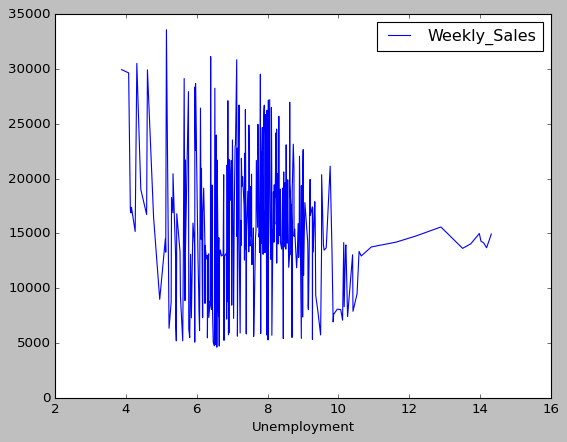

In [69]:
unemployment = pd.pivot_table(dataset, values = "Weekly_Sales", index= "Unemployment")
unemployment.plot()

<Axes: xlabel='CPI'>

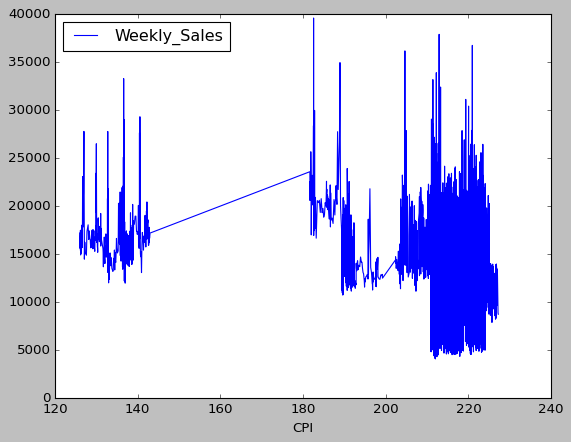

In [70]:
CPI = pd.pivot_table(dataset, values = "Weekly_Sales", index= "CPI")
CPI.plot()

<Axes: xlabel='Fuel_Price'>

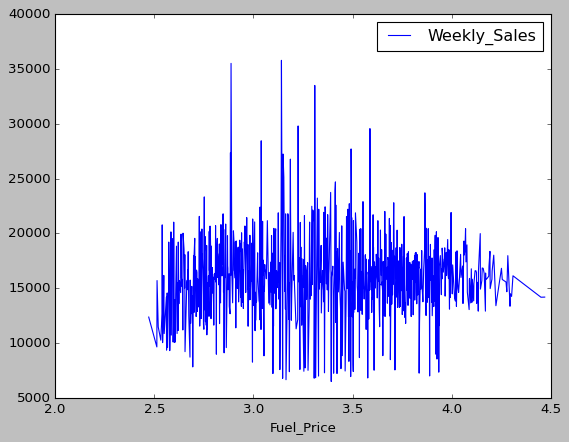

In [71]:
fuel_price = pd.pivot_table(dataset, values = "Weekly_Sales", index= "Fuel_Price")
fuel_price.plot()

<Axes: xlabel='Temperature'>

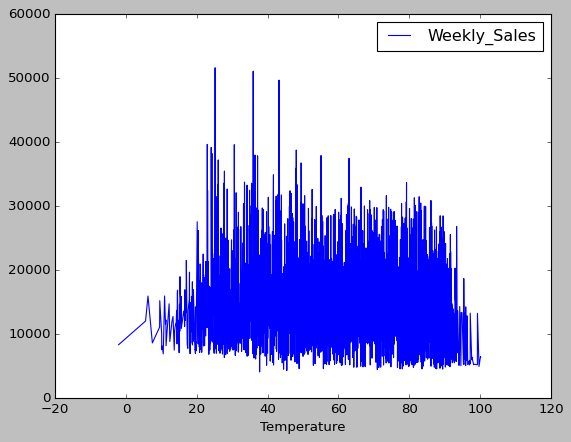

In [72]:
temp = pd.pivot_table(dataset, values = "Weekly_Sales", index= "Temperature")
temp.plot()